<a href="https://colab.research.google.com/github/Ishaan-Dahiya/AWS-Assignment/blob/main/Liver_Cirrhosis_staging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import os

# Utility function to calculate both MAPE and RMSE
def calculate_metrics(y_true, y_pred):
    mape = mean_absolute_percentage_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return mape, rmse

# Function to plot feature importance
def plot_feature_importance(model, feature_names, model_name):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title(f'Feature Importance - {model_name}')
    sns.barplot(x=importances[indices], y=[feature_names[i] for i in indices])
    plt.tight_layout()
    plt.show()

Descriptive Statistics:
            N_Years     Age_Years     Bilirubin       Albumin      Alk_Phos  \
count  25000.000000  25000.000000  25000.000000  25000.000000  25000.000000   
mean       5.170184     50.673636      3.402644      3.486578   1995.675597   
std        2.990934     10.239991      4.707491      0.380488   1798.885660   
min        0.112329     26.295890      0.300000      1.960000    289.000000   
25%        2.958904     42.997260      0.800000      3.290000   1032.000000   
50%        4.602740     50.682192      1.300000      3.510000   1828.000000   
75%        7.057534     57.410959      3.400000      3.750000   1982.655769   
max       13.136986     78.493151     28.000000      4.640000  13862.400000   

               SGOT     Platelets   Prothrombin        Stage  
count  25000.000000  25000.000000  25000.000000  25000.00000  
mean     123.166345    256.007337     10.734549      2.00116  
std       47.747616     98.679006      0.904436      0.81387  
min       26

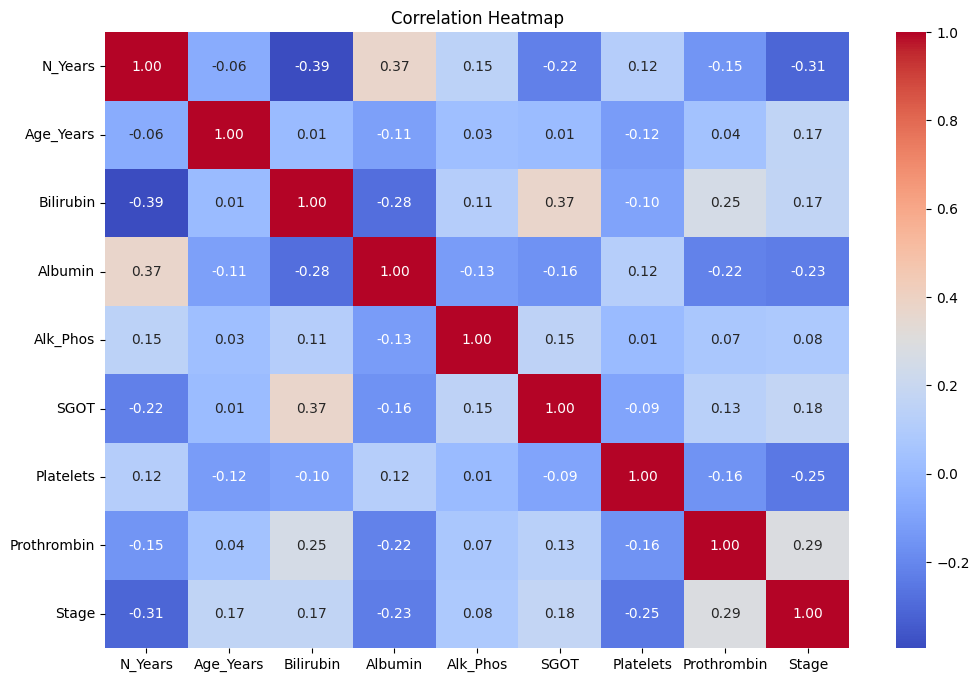

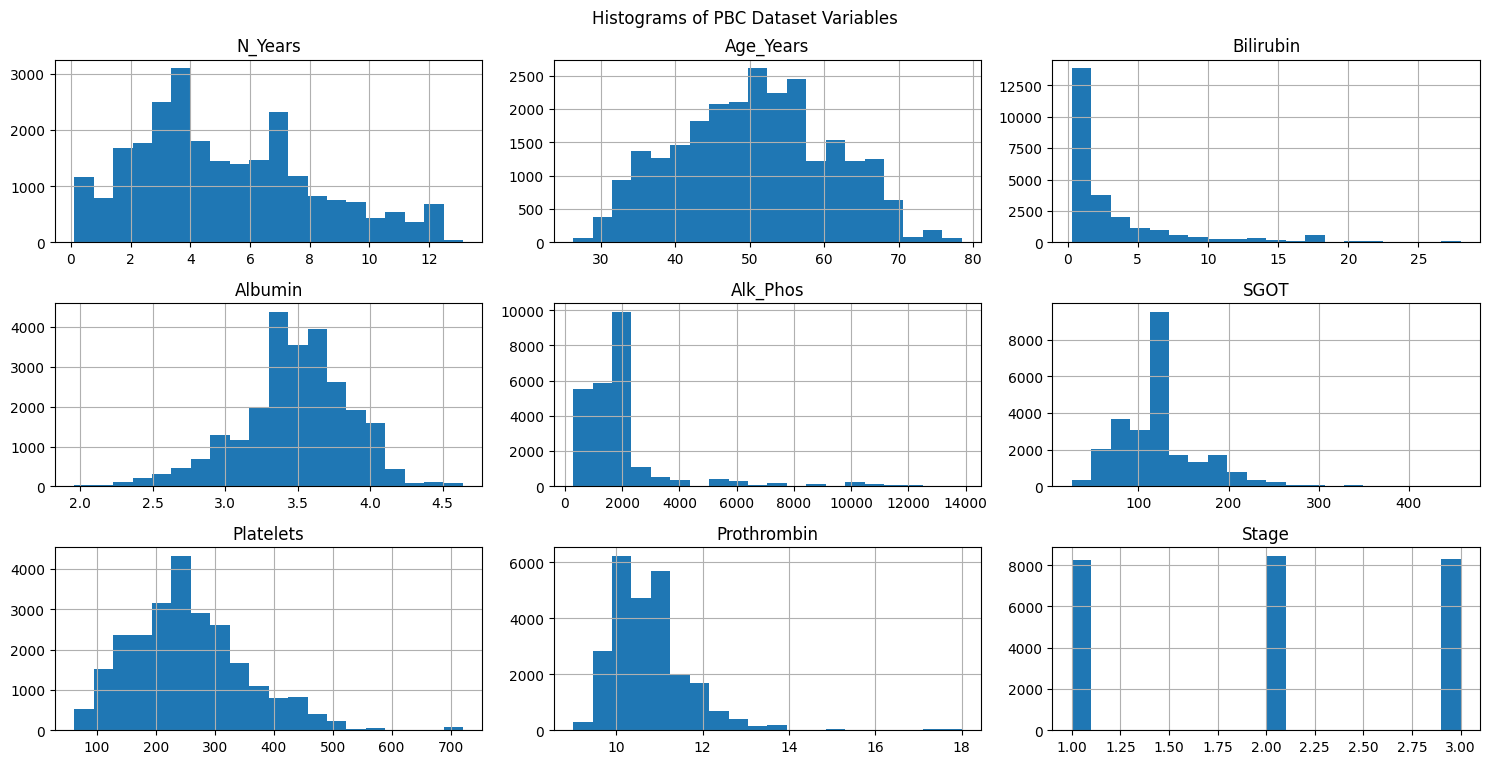

In [ ]:
# 1) Descriptive Analytics
# -------------------------
# Load the dataset
file_path = '/content/Data_Team Project_BUSI 652.xlsx'  # Update path
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Descriptive analytics to understand basic statistics of the data
print("Descriptive Statistics:")
print(df.describe())

# 2) Data Visualization
# ---------------------
# Correlation heatmap and histogram to visualize relationships and distributions
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

df.hist(bins=20, figsize=(15, 10), layout=(4, 3))
plt.suptitle('Histograms of PBC Dataset Variables')
plt.tight_layout()
plt.show()

# Define features and target variable
X = df.drop('Stage', axis=1)
y = df['Stage']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Store results for comparison
model_metrics = []

MAPE for Decision Tree: 0.0688
RMSE for Decision Tree: 0.3933


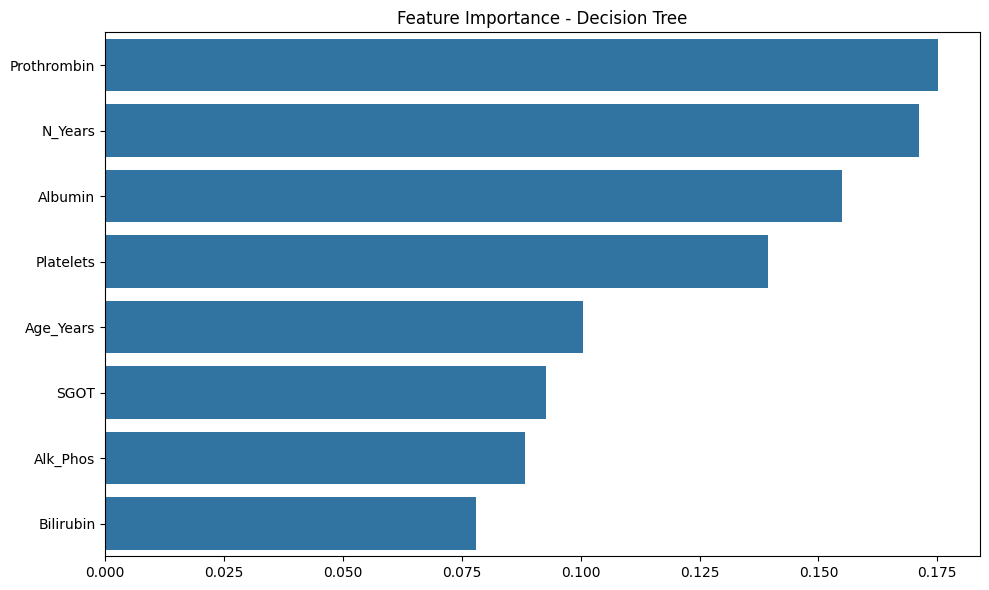

Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Decision Tree MAPE: 0.0721
Best Decision Tree RMSE: 0.4023


In [ ]:
# 3) Decision Tree Classifier (Model-1)
# --------------------------------------
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
mape_dt, rmse_dt = calculate_metrics(y_test, y_pred_dt)
print(f"MAPE for Decision Tree: {mape_dt:.4f}")
print(f"RMSE for Decision Tree: {rmse_dt:.4f}")
model_metrics.append(('Decision Tree', mape_dt, rmse_dt))

# Plotting feature importance for Decision Tree
plot_feature_importance(dt_classifier, X.columns, 'Decision Tree')

# 4) Hypertuning Decision Tree (Model-1) and selecting the optimum one
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train, y_train)
best_dt_model = dt_grid_search.best_estimator_
y_pred_best_dt = best_dt_model.predict(X_test)
mape_best_dt, rmse_best_dt = calculate_metrics(y_test, y_pred_best_dt)
print("Best Decision Tree Parameters:", dt_grid_search.best_params_)
print(f"Best Decision Tree MAPE: {mape_best_dt:.4f}")
print(f"Best Decision Tree RMSE: {rmse_best_dt:.4f}")
model_metrics.append(('Best Decision Tree', mape_best_dt, rmse_best_dt))


MAPE for Random Forest: 0.0424
RMSE for Random Forest: 0.2905


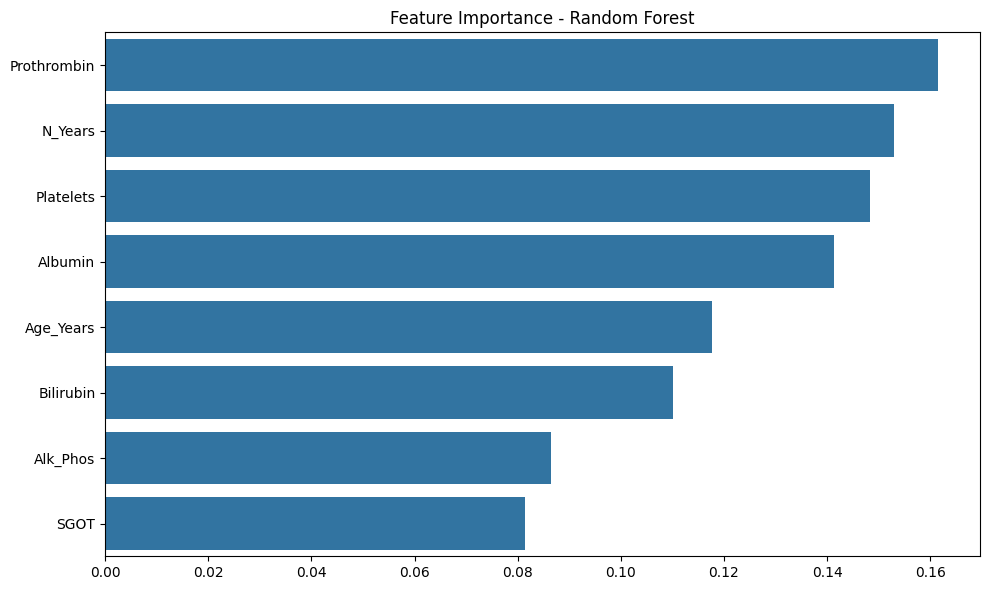

Best Random Forest Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Random Forest MAPE: 0.0429
Best Random Forest RMSE: 0.2912


In [ ]:
# 5) Random Forest Classifier (Model-2)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') # Or 'median', etc.
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
mape_rf, rmse_rf = calculate_metrics(y_test, y_pred_rf)
print(f"MAPE for Random Forest: {mape_rf:.4f}")
print(f"RMSE for Random Forest: {rmse_rf:.4f}")
model_metrics.append(('Random Forest', mape_rf, rmse_rf))

# Plotting feature importance for Random Forest
plot_feature_importance(rf_classifier, X.columns, 'Random Forest')

# 6) Hypertuning Random Forest (Model-2)
rf_params = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
mape_best_rf, rmse_best_rf = calculate_metrics(y_test, y_pred_best_rf)
print("Best Random Forest Parameters:", rf_grid_search.best_params_)
print(f"Best Random Forest MAPE: {mape_best_rf:.4f}")
print(f"Best Random Forest RMSE: {rmse_best_rf:.4f}")
model_metrics.append(('Best Random Forest', mape_best_rf, rmse_best_rf))

In [ ]:
# 7) SVM Classifiers (Model-3, Model-4, Model-5)
# ----------------------------------------------
# Linear SVM (Model-3)
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_svm_linear = svm_linear.predict(X_test)
mape_svm_linear, rmse_svm_linear = calculate_metrics(y_test, y_pred_svm_linear)
print(f"MAPE for Linear SVM: {mape_svm_linear:.4f}")
print(f"RMSE for Linear SVM: {rmse_svm_linear:.4f}")
model_metrics.append(('Linear SVM', mape_svm_linear, rmse_svm_linear))

# Polynomial SVM (Model-4)
svm_poly = SVC(kernel='poly', random_state=42)
svm_poly.fit(X_train, y_train)
y_pred_svm_poly = svm_poly.predict(X_test)
mape_svm_poly, rmse_svm_poly = calculate_metrics(y_test, y_pred_svm_poly)
print(f"MAPE for Polynomial SVM: {mape_svm_poly:.4f}")
print(f"RMSE for Polynomial SVM: {rmse_svm_poly:.4f}")
model_metrics.append(('Polynomial SVM', mape_svm_poly, rmse_svm_poly))

# Radial SVM (Model-5)
svm_radial = SVC(kernel='rbf', random_state=42)
svm_radial.fit(X_train, y_train)
y_pred_svm_radial = svm_radial.predict(X_test)
mape_svm_radial, rmse_svm_radial = calculate_metrics(y_test, y_pred_svm_radial)
print(f"MAPE for Radial SVM: {mape_svm_radial:.4f}")
print(f"RMSE for Radial SVM: {rmse_svm_radial:.4f}")
model_metrics.append(('Radial SVM', mape_svm_radial, rmse_svm_radial))

MAPE for Linear SVM: 0.3726
RMSE for Linear SVM: 0.8759
MAPE for Polynomial SVM: 0.3827
RMSE for Polynomial SVM: 1.2541
MAPE for Radial SVM: 0.4307
RMSE for Radial SVM: 1.0403


MAPE for Bagging: 0.0486
RMSE for Bagging: 0.3143


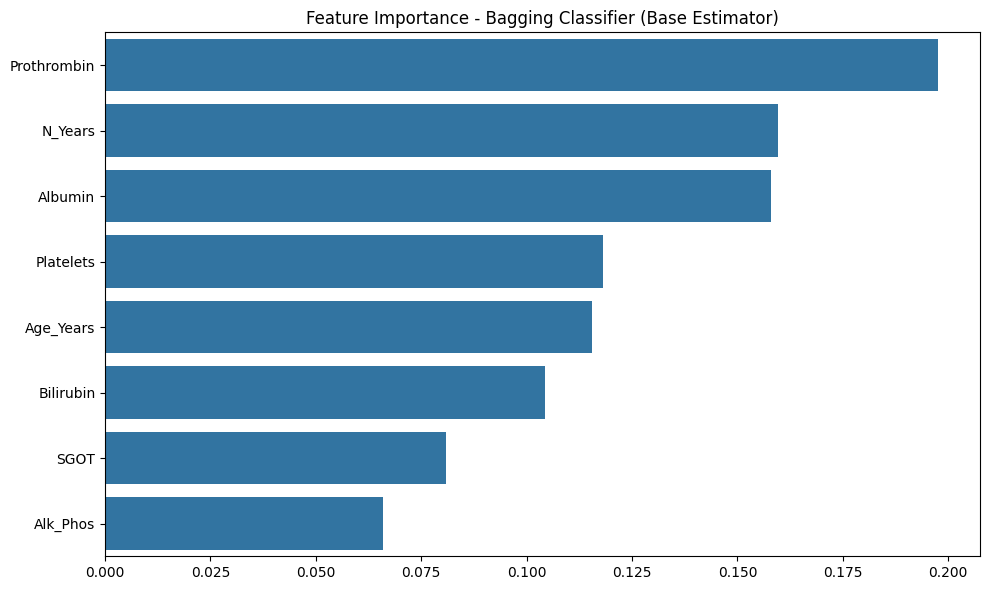

In [ ]:
# 8) Bagging Classifier (Model-6)
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), random_state=42, n_estimators=100)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)
mape_bagging, rmse_bagging = calculate_metrics(y_test, y_pred_bagging)
print(f"MAPE for Bagging: {mape_bagging:.4f}")
print(f"RMSE for Bagging: {rmse_bagging:.4f}")
model_metrics.append(('Bagging', mape_bagging, rmse_bagging))

# Access an estimator from the bagging classifier that has been fitted
plot_feature_importance(bagging_model.estimators_[0], X.columns, 'Bagging Classifier (Base Estimator)')

MAPE for Gradient Boosting: 0.1284, RMSE: 0.5066


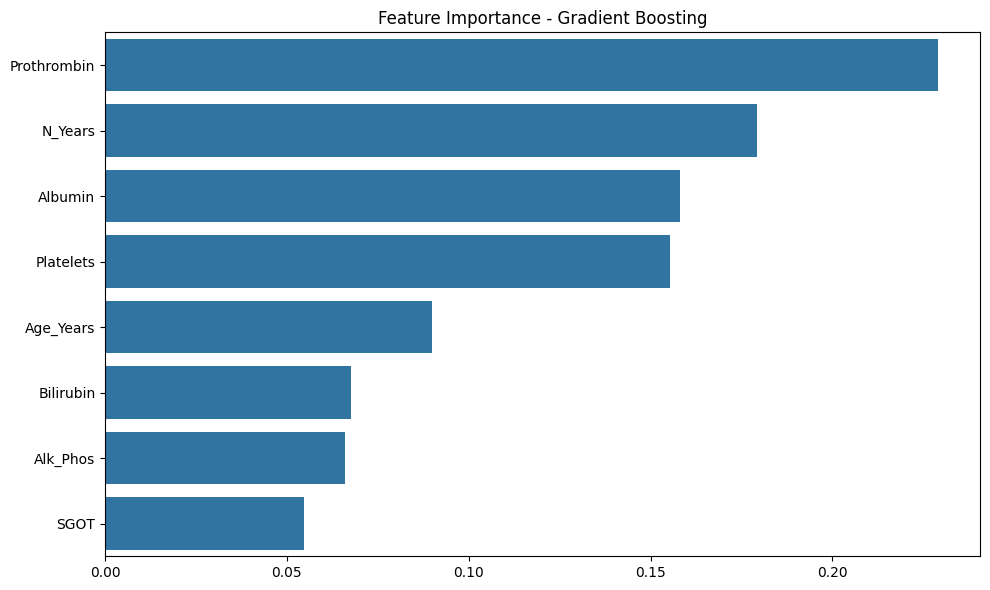

In [ ]:
# 9) Gradient Boost (Model-7)
# Import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and fit Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate and print metrics
mape_gb, rmse_gb = calculate_metrics(y_test, y_pred_gb)
print(f"MAPE for Gradient Boosting: {mape_gb:.4f}, RMSE: {rmse_gb:.4f}")

# Plot feature importance
plot_feature_importance(gb_classifier, df.columns[:-1], 'Gradient Boosting')  # Assuming last column is the target

In [ ]:
# Hyperparameter tuning for Gradient Boosting
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
gb_grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=3, scoring='accuracy')
gb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [ ]:
# Best model and its evaluation
best_gb_model = gb_grid_search.best_estimator_
y_pred_best_gb = best_gb_model.predict(X_test)
mape_best_gb, rmse_best_gb = calculate_metrics(y_test, y_pred_best_gb)
print("Best Gradient Boosting Parameters:", gb_grid_search.best_params_)
print(f"Best Gradient Boosting MAPE: {mape_best_gb:.4f}, RMSE: {rmse_best_gb:.4f}")

Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best Gradient Boosting MAPE: 0.0391, RMSE: 0.2843


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Assuming X_train was a DataFrame before imputation
# Convert X_train to DataFrame after imputation if necessary
X_train = pd.DataFrame(X_train, columns=[str(i) for i in range(X_train.shape[1])])  # Adjust index if you know column names

# Calculate mean values as a DataFrame
avg_values = pd.DataFrame([X_train.mean()])

# Define age range for the simulation
age_range = np.linspace(df['Age_Years'].min(), df['Age_Years'].max(), 100)

# Assume best_rf_model is already trained and available
simulated_predictions = []
for age in age_range:
    simulation_input = avg_values.copy()
    simulation_input['0'] = age  # Update '0' to the actual column index or name for 'Age_Years'
    simulated_predictions.append(best_rf_model.predict(simulation_input)[0])

# Construct the results DataFrame
simulation_df = pd.DataFrame({'Age_Years': age_range, 'Predicted Stage': simulated_predictions})
print("Simulation Results (Age_Years):")
print(simulation_df)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without

Simulation Results (Age_Years):
    Age_Years  Predicted Stage
0   26.295890                1
1   26.823135                1
2   27.350381                1
3   27.877626                1
4   28.404871                1
..        ...              ...
95  76.384170                1
96  76.911416                1
97  77.438661                1
98  77.965906                1
99  78.493151                1

[100 rows x 2 columns]


In [ ]:
# Assuming gb_classifier is your Gradient Boosting model
y_pred_gb = gb_classifier.predict(X_test)
mape_gb, rmse_gb = calculate_metrics(y_test, y_pred_gb)
model_metrics.append(('Gradient Boosting', mape_gb, rmse_gb))

# After appending, create the DataFrame
model_metrics_df = pd.DataFrame(model_metrics, columns=['Model', 'MAPE', 'RMSE'])


In [ ]:
# 11) MAPE and RMSE comparison
model_metrics_df = pd.DataFrame(model_metrics, columns=['Model', 'MAPE', 'RMSE'])

# Display the comparison table of MAPE and RMSE for all models
print("MAPE and RMSE Comparison:")
print(model_metrics_df)

MAPE and RMSE Comparison:
                Model      MAPE      RMSE
0       Decision Tree  0.068844  0.393277
1  Best Decision Tree  0.072133  0.402327
2       Random Forest  0.042356  0.290517
3  Best Random Forest  0.042867  0.291204
4          Linear SVM  0.372600  0.875900
5      Polynomial SVM  0.382711  1.254113
6          Radial SVM  0.430667  1.040320
7             Bagging  0.048556  0.314325
8             Bagging  0.048556  0.314325
9   Gradient Boosting  0.128444  0.506623


<ipython-input-25-13f7c9225074>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAPE', data=model_metrics_df, palette='Blues_d')


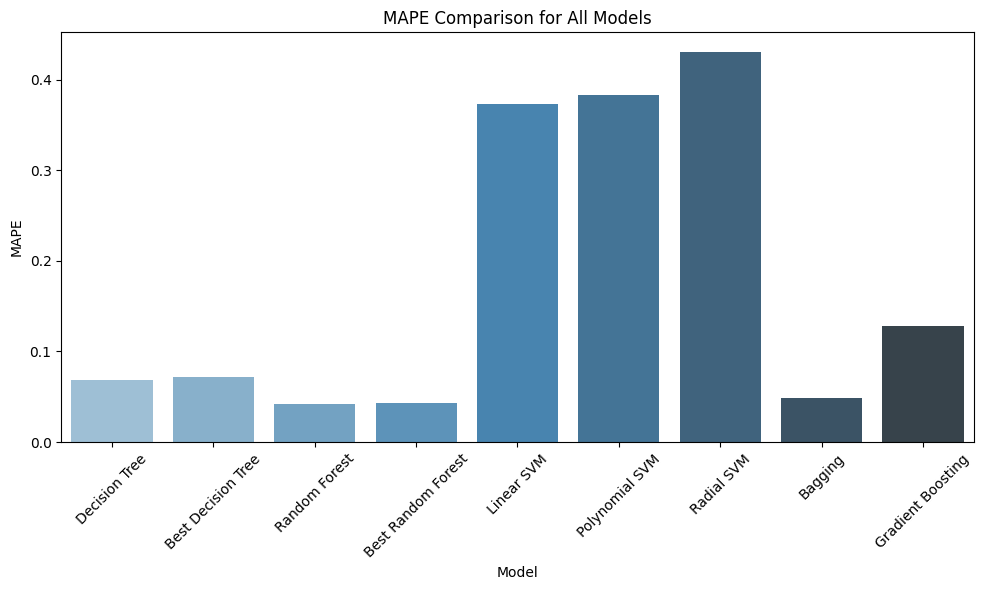

<ipython-input-25-13f7c9225074>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=model_metrics_df, palette='Greens_d')


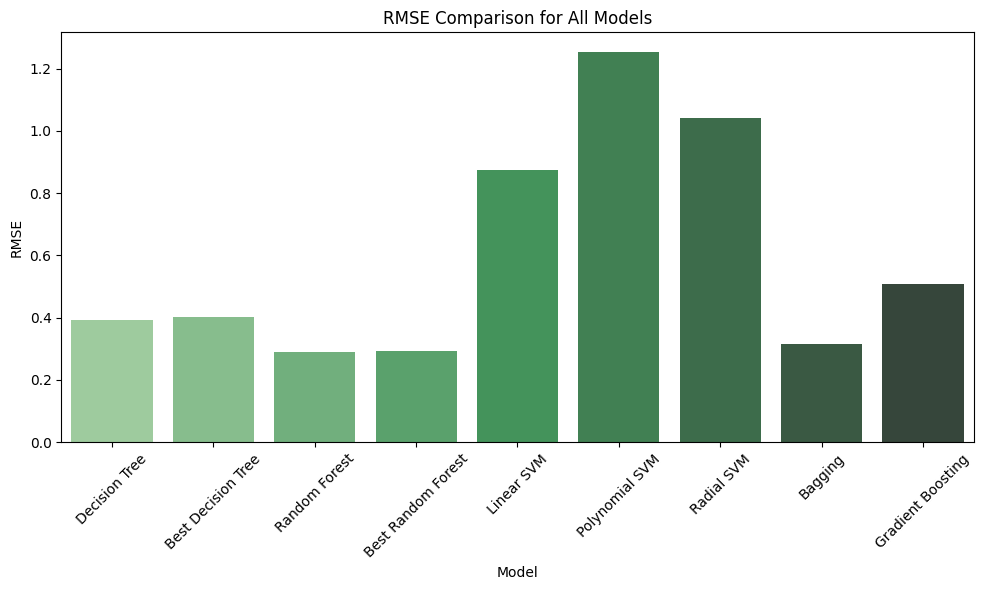

In [ ]:
# 12) Visualization of MAPE and RMSE comparison
# Plotting MAPE comparison for all models
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MAPE', data=model_metrics_df, palette='Blues_d')
plt.title('MAPE Comparison for All Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting RMSE comparison for all models
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='RMSE', data=model_metrics_df, palette='Greens_d')
plt.title('RMSE Comparison for All Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 13) Exporting the results to CSV
output_dir = './model_output'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Exporting model metrics to CSV
model_metrics_df.to_csv(os.path.join(output_dir, 'model_metrics_comparison.csv'), index=False)

# Exporting simulation results to CSV
simulation_df.to_csv(os.path.join(output_dir, 'simulation_results.csv'), index=False)

print(f"Exported model metrics and simulation results to {output_dir}")

Exported model metrics and simulation results to ./model_output
